In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [10]:
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

In [11]:
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


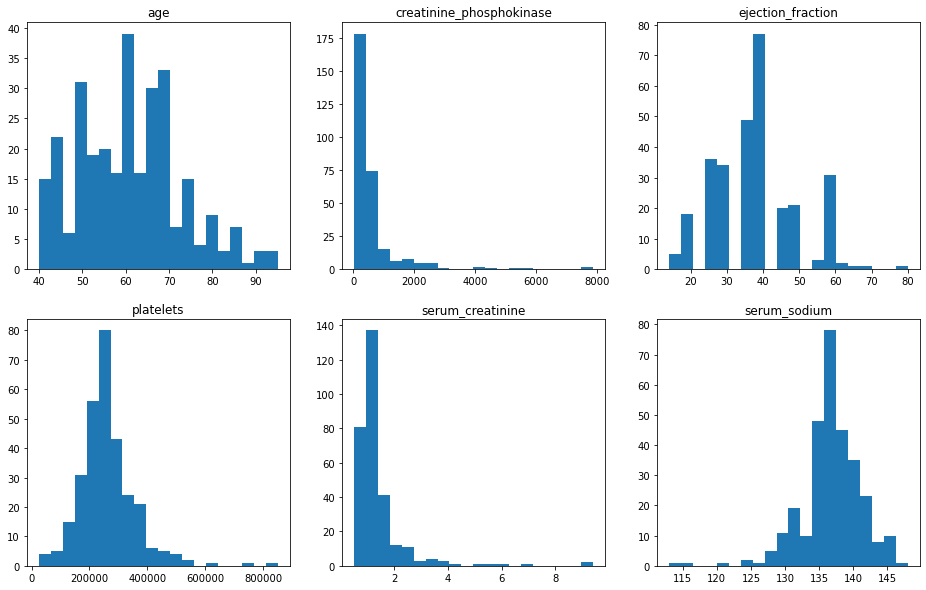

In [20]:
# plt.figure(figsize=(100, 16))

n_bins = 20

fig, axs = plt.subplots(2,3, figsize=(16, 10))

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')


plt.show()


### На основании гистограмм определите диапазоны значений для каждого из признаков, а также возле какого значения лежит наибольшее количество наблюдений.

In [27]:
df.describe().loc[['min', 'max', 'mean']]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418


In [28]:
df.mode()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,60.0,582,35,263358.03,1.0,136


# ---------------------------------------------------

In [29]:
#  Так как библиотека Sklearn работает с NumPy массива, 
# то преобразуйте датафрейм к двумерному массиву NumPy,
# где строка соответствует наблюдению, а столбец признаку

data = df.to_numpy(dtype='float')
data

array([[7.5000000e+01, 5.8200000e+02, 2.0000000e+01, 2.6500000e+05,
        1.9000000e+00, 1.3000000e+02],
       [5.5000000e+01, 7.8610000e+03, 3.8000000e+01, 2.6335803e+05,
        1.1000000e+00, 1.3600000e+02],
       [6.5000000e+01, 1.4600000e+02, 2.0000000e+01, 1.6200000e+05,
        1.3000000e+00, 1.2900000e+02],
       ...,
       [4.5000000e+01, 2.0600000e+03, 6.0000000e+01, 7.4200000e+05,
        8.0000000e-01, 1.3800000e+02],
       [4.5000000e+01, 2.4130000e+03, 3.8000000e+01, 1.4000000e+05,
        1.4000000e+00, 1.4000000e+02],
       [5.0000000e+01, 1.9600000e+02, 4.5000000e+01, 3.9500000e+05,
        1.6000000e+00, 1.3600000e+02]])

In [65]:
#  Настройка стандартизации на основе первых 150 наблюдений

scaler_150 = preprocessing.StandardScaler().fit(data[:150, :])
data_scaled_150 = scaler_150.transform(data)

In [72]:
# стандартизаця всех данных
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)

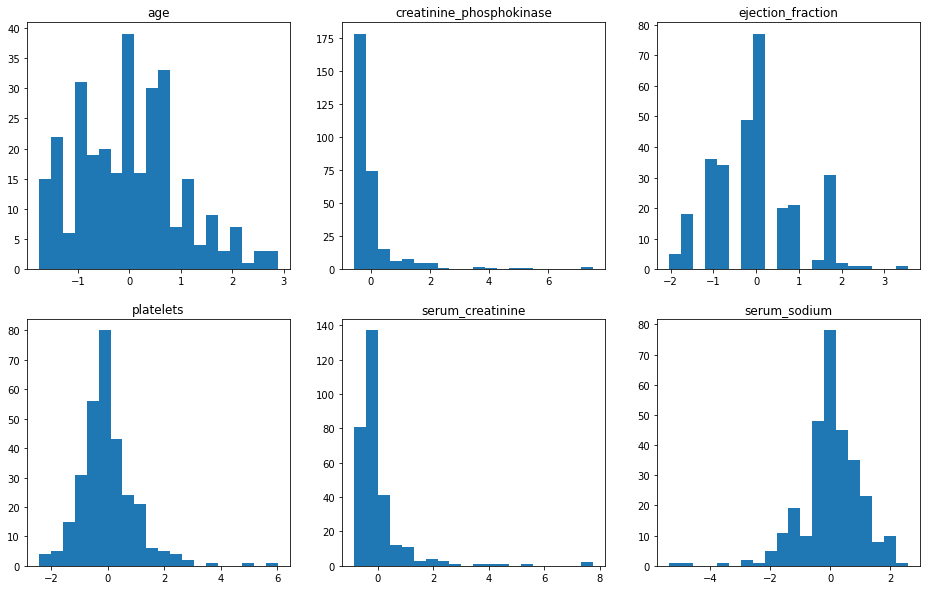

In [61]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [121]:
#  Рассчитайте мат. ожидание и СКО до и после стандартизации. 
# На основании этих значений выведите для каждого признака формулы 
# по которым они стандартизировались.

print("MEAN and STD for main data")
print(df.describe().loc[['mean', 'std']])

print()
print("MEAN and STD for scaled_150 data")
print(np.mean(data_scaled_150, axis=0), np.std(data_scaled_150, axis=0))
print()

print("MEAN and STD for scaled data")
print(np.mean(data_scaled, axis=0), np.std(data_scaled, axis=0))

MEAN and STD for main data
            age  creatinine_phosphokinase  ejection_fraction      platelets  \
mean  60.833893                581.839465          38.083612  263358.029264   
std   11.894809                970.287881          11.834841   97804.236869   

      serum_creatinine  serum_sodium  
mean           1.39388    136.625418  
std            1.03451      4.412477  

MEAN and STD for scaled_150 data
[-0.16970362 -0.02127675  0.01050249 -0.03522879 -0.1086408   0.0379076 ] [0.95382379 0.81417905 0.90610822 1.01506113 0.88542887 0.9703736 ]

MEAN and STD for scaled data
[ 5.70335306e-16  0.00000000e+00 -3.26754603e-17  7.72329061e-17
  1.42583827e-16 -8.67384945e-16] [1. 1. 1. 1. 1. 1.]


In [74]:
print(scaler_150.var_)
print(scaler_150.mean_)

print()
print(scaler.var_)
print(scaler.mean_)

[1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]
[6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02]

[1.41013284e+02 9.38309881e+05 1.39595016e+02 9.53367655e+09
 1.06663177e+00 1.94048389e+01]
[6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]


## Приведение к диапазону

In [75]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)


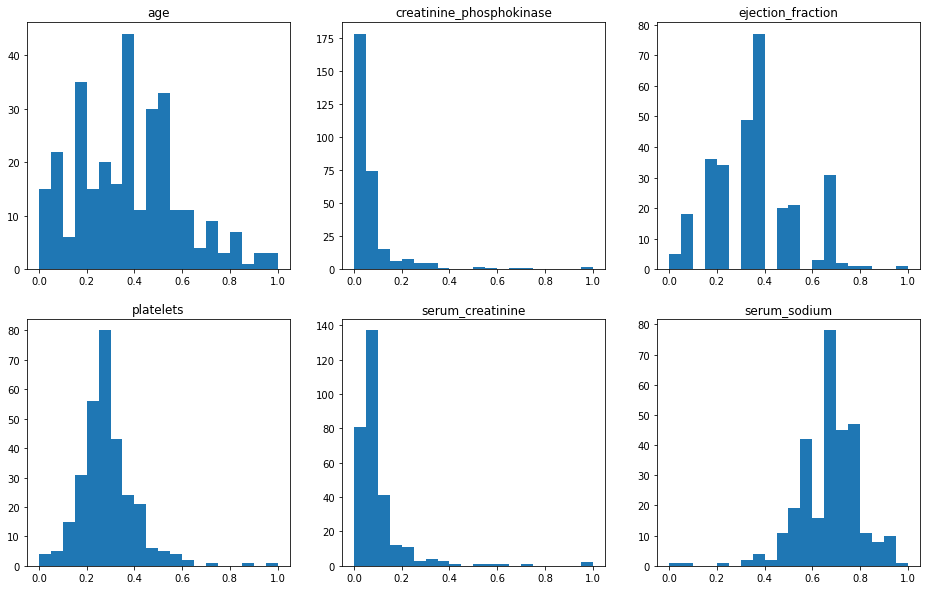

In [76]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [85]:
print(f"Min value for each column - {min_max_scaler.data_min_}")
print(f"Max value for each column - {min_max_scaler.data_max_}")

Min value for each column - [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
Max value for each column - [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]


## MaxAbsScaler & RobustScaler

In [86]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaler = max_abs_scaler.transform(data)

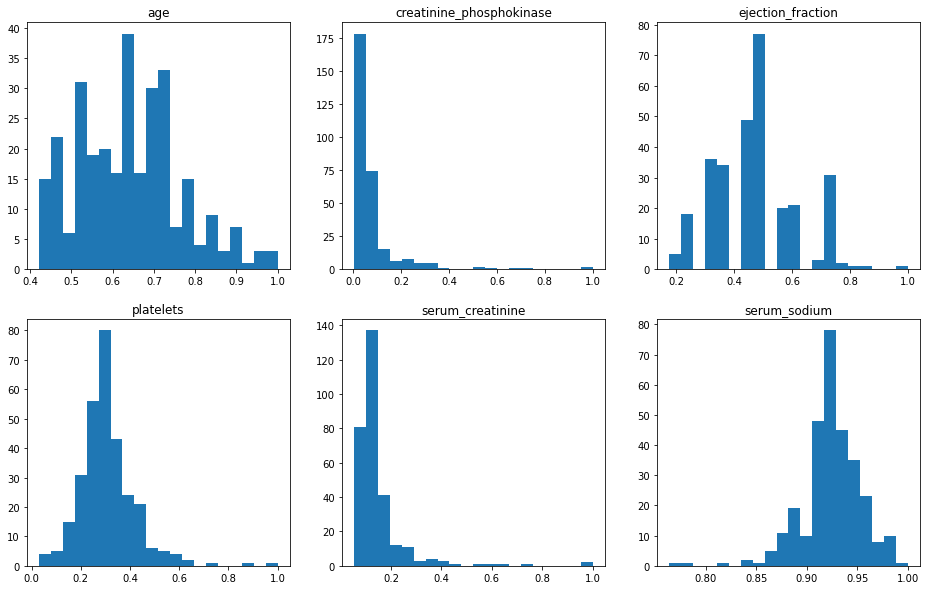

In [87]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_max_abs_scaler[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_max_abs_scaler[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_max_abs_scaler[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_max_abs_scaler[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_max_abs_scaler[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_max_abs_scaler[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [89]:
robust_transformer = preprocessing.RobustScaler().fit(data)
data_robust_transformer = robust_transformer.transform(data)

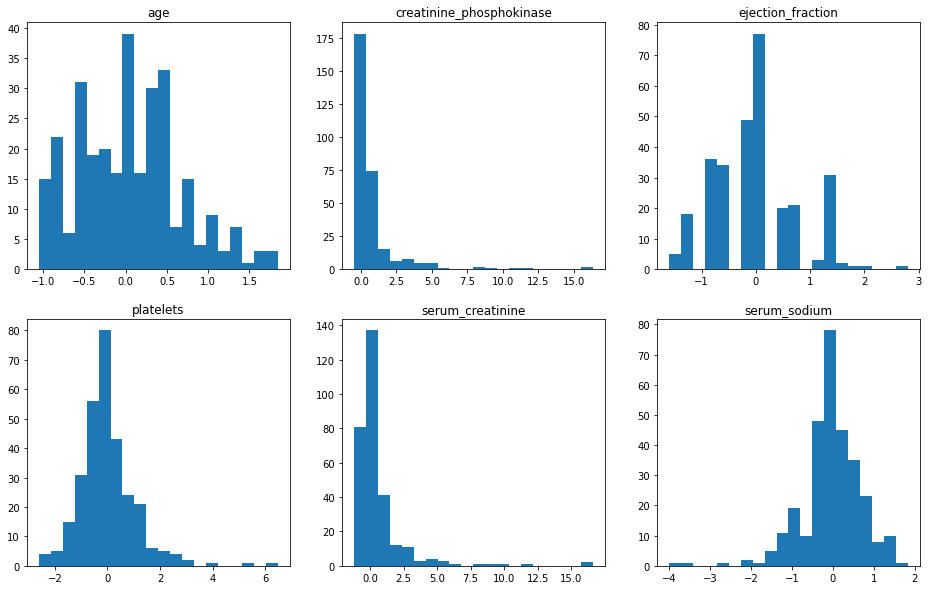

In [90]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_robust_transformer[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_robust_transformer[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_robust_transformer[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_robust_transformer[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_robust_transformer[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_robust_transformer[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [91]:
#  Напишите функцию, которая приводит все данные к диапазону [-5 10]
def set_range(data):
    scaler = preprocessing.MinMaxScaler(feature_range=[-5, 10]).fit(data)
    return scaler.transform(data)

## Нелинейные преобразования

In [125]:
quantile_transformer = preprocessing.QuantileTransformer(
    n_quantiles = 100,
    random_state=0,
    output_distribution='normal'
).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

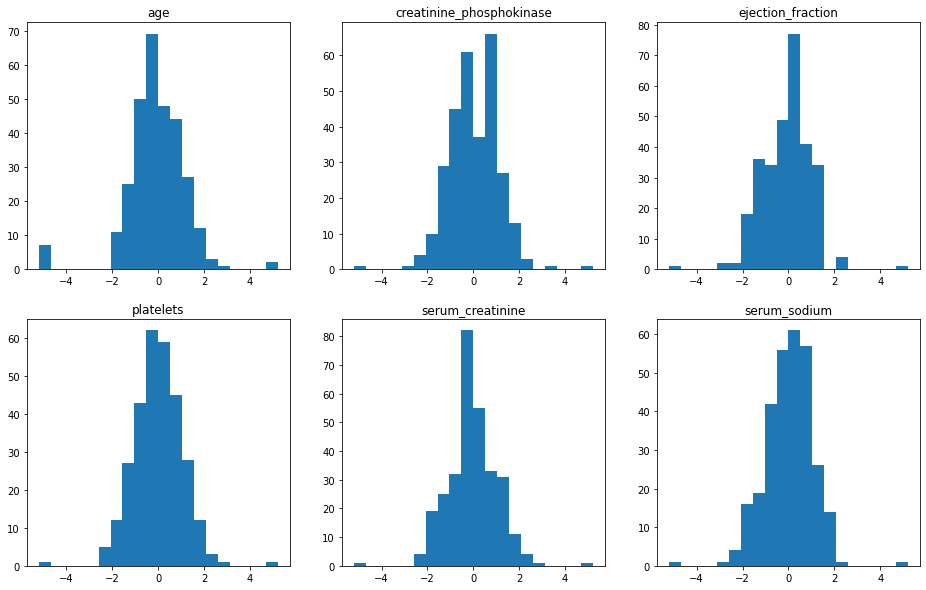

In [126]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [110]:
# Самостоятельно приведите данные к нормальному распределению используя
# PowerTransformer

pwr_transformer = preprocessing.PowerTransformer().fit(data)
data_pwr_transformer = pwr_transformer.transform(data)

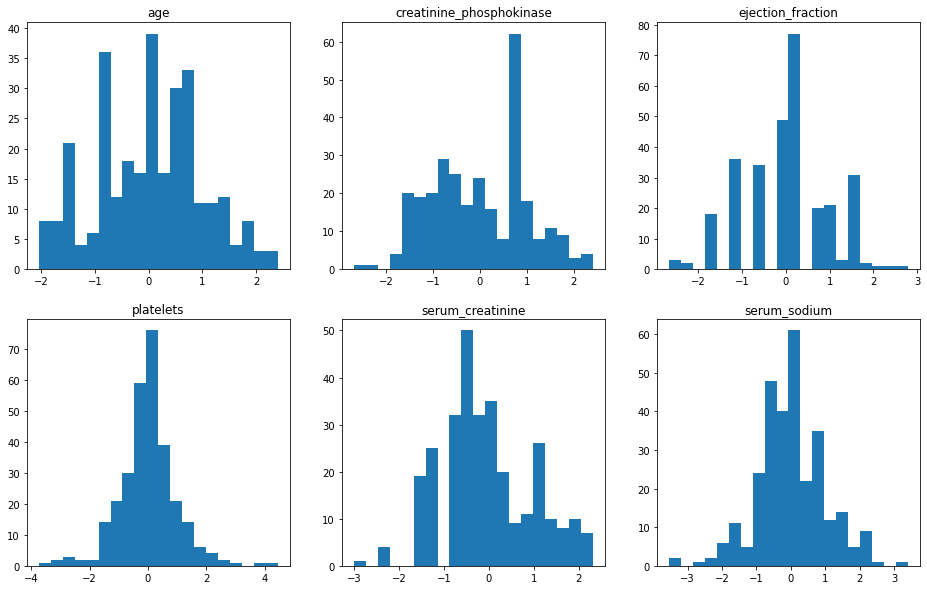

In [111]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_pwr_transformer[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_pwr_transformer[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_pwr_transformer[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_pwr_transformer[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_pwr_transformer[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_pwr_transformer[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

## Дискретизация признаков

In [115]:
kbins_descret = preprocessing.KBinsDiscretizer([3,4,3,10,2,4], encode='ordinal').fit(data)
data_kbins_descret = kbins_descret.transform(data)

In [116]:
data_kbins_descret

array([[2., 3., 0., 6., 1., 0.],
       [1., 3., 1., 5., 1., 1.],
       [2., 1., 0., 1., 1., 0.],
       ...,
       [0., 3., 2., 9., 0., 2.],
       [0., 3., 1., 0., 1., 3.],
       [0., 1., 2., 9., 1., 1.]])

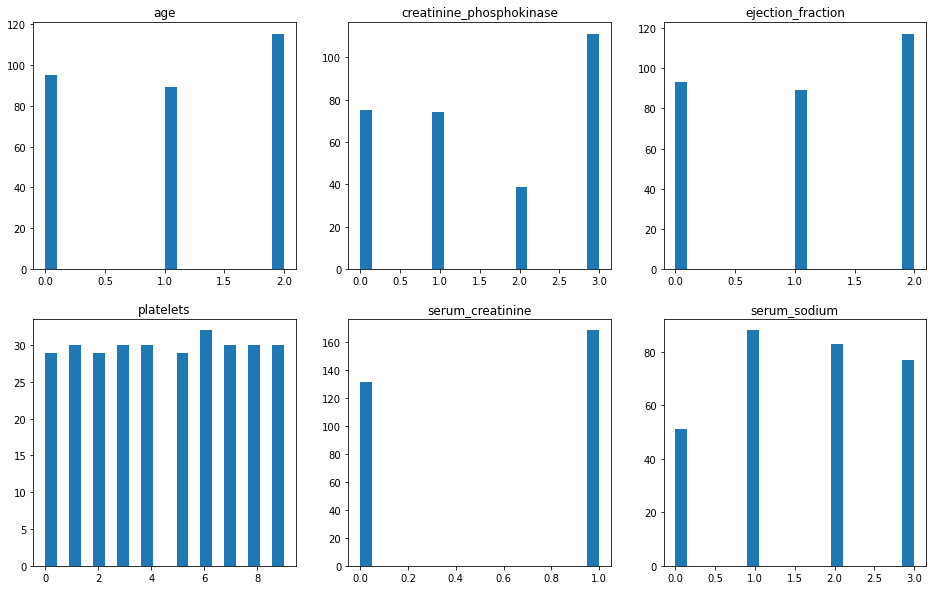

In [117]:
fig, axs = plt.subplots(2,3, figsize=(16,10))

axs[0, 0].hist(data_kbins_descret[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_kbins_descret[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_kbins_descret[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_kbins_descret[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_kbins_descret[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_kbins_descret[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [120]:
kbins_descret.bin_edges_


array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
       285200., 319800., 374600., 850000.]),
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)